In [1]:
#Importing the required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
#importing the dataset
df= pd.read_csv("/content/uber.csv")


**1. Pre-process the dataset.**


In [3]:
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [4]:
df.info() #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80416 entries, 0 to 80415
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         80416 non-null  int64  
 1   key                80416 non-null  object 
 2   fare_amount        80416 non-null  float64
 3   pickup_datetime    80416 non-null  object 
 4   pickup_longitude   80416 non-null  float64
 5   pickup_latitude    80416 non-null  float64
 6   dropoff_longitude  80416 non-null  float64
 7   dropoff_latitude   80415 non-null  float64
 8   passenger_count    80415 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 5.5+ MB


In [5]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
df =df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [8]:
df.shape
#To get the total (Rows,Columns)

(80416, 7)

In [9]:
df.dtypes
#To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80416 entries, 0 to 80415
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        80416 non-null  float64
 1   pickup_datetime    80416 non-null  object 
 2   pickup_longitude   80416 non-null  float64
 3   pickup_latitude    80416 non-null  float64
 4   dropoff_longitude  80416 non-null  float64
 5   dropoff_latitude   80415 non-null  float64
 6   passenger_count    80415 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.3+ MB


In [11]:
df.describe() #To get statistics of each columns

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,80416.000000,80416.000000,80416.000000,80416.000000,80415.000000,80415.000000
mean,11.381542,-72.533096,39.945845,-72.567713,39.934459,1.674874
std,9.924870,11.857315,8.557173,15.738776,6.803074,1.295577
min,-5.000000,-1340.648410,-74.015515,-3356.666300,-74.009465,0.000000
25%,6.000000,-73.992020,40.734812,-73.991417,40.733664,1.000000
50%,8.500000,-73.981775,40.752595,-73.980082,40.752982,1.000000
75%,12.500000,-73.967171,40.767118,-73.963773,40.768112,2.000000
max,350.000000,40.808425,1644.421482,40.828672,872.697628,6.000000


**2. Filling Missing values**


In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     1
passenger_count      1
dtype: int64

In [13]:
df['pickup_latitude'].fillna(value=df['pickup_latitude']
                             .mean(),inplace = True)
df['passenger_count'].fillna(value=df['passenger_count']
                             .median(),inplace = True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude']
                              .mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude']
                               .median(),inplace = True)

In [14]:
df.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [16]:
df['pickup_datetime']


0        2015-05-07 19:52:06 UTC
1        2009-07-17 20:04:56 UTC
2        2009-08-24 21:45:00 UTC
3        2009-06-26 08:22:21 UTC
4        2014-08-28 17:47:00 UTC
                  ...           
80411    2010-05-05 23:40:00 UTC
80412    2009-04-02 14:35:00 UTC
80413    2013-05-29 15:25:23 UTC
80414    2011-11-17 14:49:35 UTC
80415    2011-11-01 02:33:26 UTC
Name: pickup_datetime, Length: 80416, dtype: object

Date is in incorrct format

In [17]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime,errors='coerce')

In [18]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

To seperate each time of date and time


In [19]:
df=df.assign(hour = df.pickup_datetime.dt.hour,
day= df.pickup_datetime.dt.day, month = df.pickup_datetime.dt.month, 
year = df.pickup_datetime.dt.year,
dayofweek = df.pickup_datetime.dt.dayofweek)


In [20]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17,28,8,2014,3


In [21]:
# drop the column 'pickup_daetime' using drop() # 'axis = 1' drops the specified column
df = df.drop('pickup_datetime',axis=1)

In [22]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17,28,8,2014,3


In [23]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

**Checking outliers and filling them**


fare_amount              AxesSubplot(0.125,0.71587;0.227941x0.16413)
pickup_longitude      AxesSubplot(0.398529,0.71587;0.227941x0.16413)
pickup_latitude       AxesSubplot(0.672059,0.71587;0.227941x0.16413)
dropoff_longitude       AxesSubplot(0.125,0.518913;0.227941x0.16413)
dropoff_latitude     AxesSubplot(0.398529,0.518913;0.227941x0.16413)
passenger_count      AxesSubplot(0.672059,0.518913;0.227941x0.16413)
hour                    AxesSubplot(0.125,0.321957;0.227941x0.16413)
day                  AxesSubplot(0.398529,0.321957;0.227941x0.16413)
month                AxesSubplot(0.672059,0.321957;0.227941x0.16413)
year                       AxesSubplot(0.125,0.125;0.227941x0.16413)
dayofweek               AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

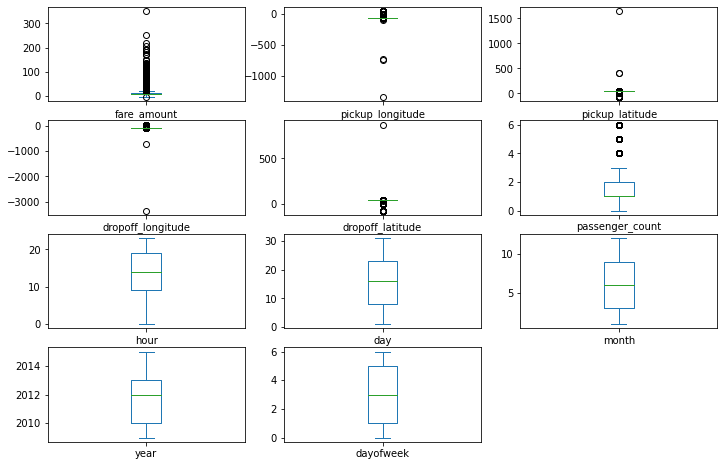

In [24]:
df.plot(kind = "box",
        subplots = True,
        layout = (4,3),
        figsize=(12,8)) #Boxplot to check

In [25]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col): 
  Q1 = df1[col].quantile(0.25) 
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1-1.5*IQR 
  upper_whisker = Q3+1.5*IQR
  df[col] = np.clip(df1[col] , 
                    lower_whisker , 
                    upper_whisker)
  return df1
def treat_outliers_all(df1 , col_list):
  for c in col_list:
    df1 = remove_outlier(df , c)
  return df1

In [26]:
df =treat_outliers_all(df , df.iloc[: , 0::])


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

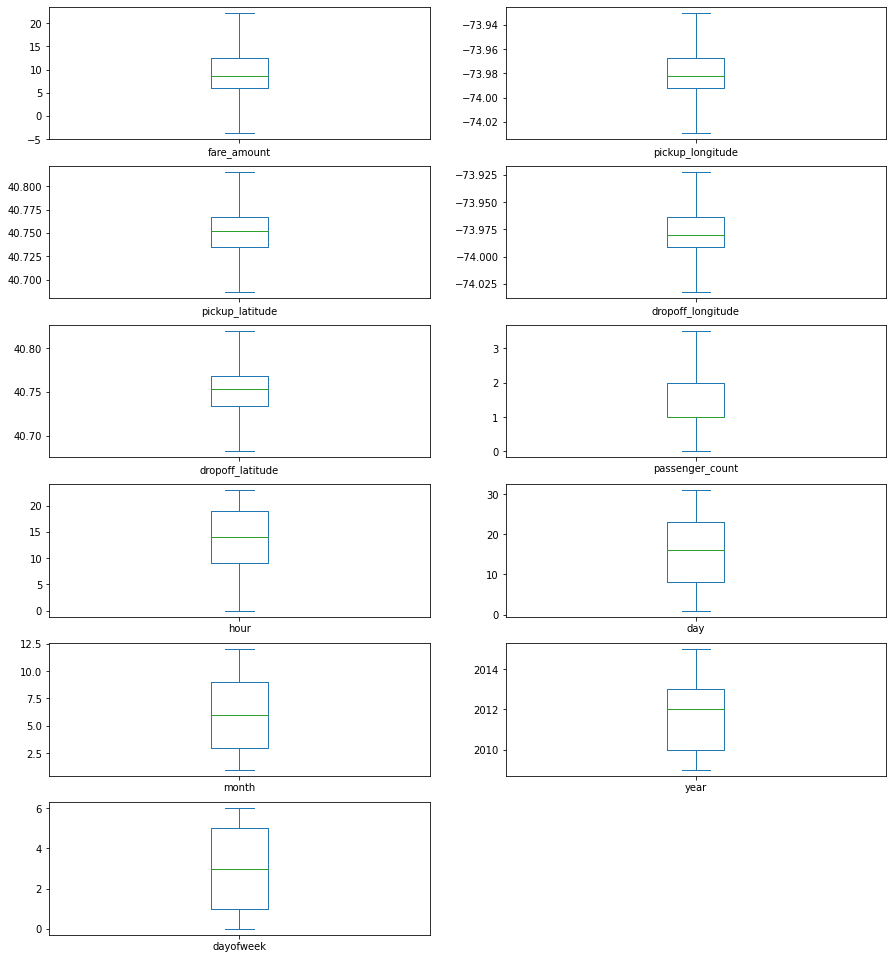

In [27]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [28]:
!pip install haversine
import haversine as hs  #Calculate the distance using Haversine to calculate the dista
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
  long1,lati1,long2,lati2 = [
      df['pickup_longitude'][pos],
      df['pickup_latitude'][pos],
      df['dropoff_longitude'][pos],
      df['dropoff_latitude'][pos]
      ] 
  loc1=(lati1,long1)
  loc2=(lati2,long2)
  c = hs.haversine(loc1,loc2)
  travel_dist.append(c)
print(travel_dist) 
df['dist_travel_km'] = travel_dist
df.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[1.6833250775073447, 2.4575932783467835, 5.036384146783453, 1.661685753650294, 4.107873890221249, 0.0, 9.521855346882292, 0.803233669062337, 2.3327142314177545, 4.889423641655177, 2.2508607308770285, 0.803233669062337, 0.3022521108558365, 3.5812557740132496, 1.3099517093917648, 1.716279792276335, 0.7299665570466272, 2.515953547298386, 1.790321726187665, 1.0347050399795192, 2.4902472008677727, 0.9594701844599927, 1.2613897673437817, 1.7517650017211177, 6.1932445014761095, 2.736192584061414, 0.7232537124105735, 3.229443537425455, 1.4295172964395384, 2.233699311547041, 11.068322428390985, 1.8950491608266506, 1.9049353402365328, 3.1821178242889583, 4.454285096421871, 2.9230236888626995, 1.200213842045202, 2.635790807404098, 2.253613903554444, 9.17226971215439, 4.826533532872274, 1.2502926870845612, 0.7984742276755328, 0.840396152683202, 0.38519924001701444, 2.434346176233359, 3.12790953326409

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929896,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.107874


In [29]:
#Uber doesn't travel over 130 kms so minimize the distance
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)


Remaining observastions in the dataset: (80416, 12)


In [30]:
#Finding inccorect latitude (Less than or greater than 90) and 
#longitude (less than or greater than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90)  |
                               (df.pickup_latitude < -90) |
                               (df.dropoff_latitude > 180)|
                               (df.pickup_longitude >-180)|
                               (df.dropoff_longitude > 90)|
                               (df.dropoff_longitude<-90)]

In [31]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [32]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929896,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.107874


In [33]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

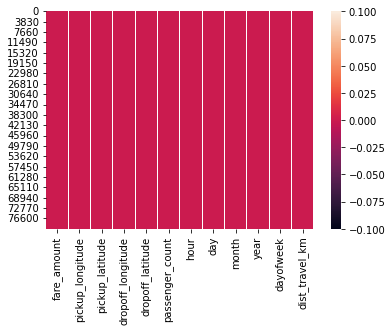

In [34]:
sns.heatmap(df.isnull()) #Free for null values

In [35]:
corr =df.corr() #Function to find the correlation
corr


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.158149,-0.113400,0.216307,-0.132636,0.014184,-0.016082,0.009252,0.029682,0.142206,0.009777,0.786336
pickup_longitude,0.158149,1.000000,0.259929,0.427068,0.075002,-0.009711,0.008879,-0.004473,0.001936,0.011804,-0.028362,0.049244
pickup_latitude,-0.113400,0.259929,1.000000,0.049440,0.521595,-0.009720,0.031000,-0.002780,0.003318,-0.009686,-0.042227,-0.074221
dropoff_longitude,0.216307,0.427068,0.049440,1.000000,0.244323,-0.007872,-0.047796,-0.000737,0.002939,0.012788,-0.003031,0.147796
dropoff_latitude,-0.132636,0.075002,0.521595,0.244323,1.000000,-0.004247,0.022633,-0.003257,-0.000808,-0.004885,-0.030995,-0.055947
passenger_count,0.014184,-0.009711,-0.009720,-0.007872,-0.004247,1.000000,0.018137,0.004826,0.015038,-0.014762,0.048082,0.009472
hour,-0.016082,0.008879,0.031000,-0.047796,0.022633,0.018137,1.000000,0.006392,-0.007455,0.003680,-0.090564,-0.029172
day,0.009252,-0.004473,-0.002780,-0.000737,-0.003257,0.004826,0.006392,1.000000,-0.013780,-0.013406,0.003701,0.007231
month,0.029682,0.001936,0.003318,0.002939,-0.000808,0.015038,-0.007455,-0.013780,1.000000,-0.119469,-0.008876,0.009340
year,0.142206,0.011804,-0.009686,0.012788,-0.004885,-0.014762,0.003680,-0.013406,-0.119469,1.000000,0.005633,0.023106


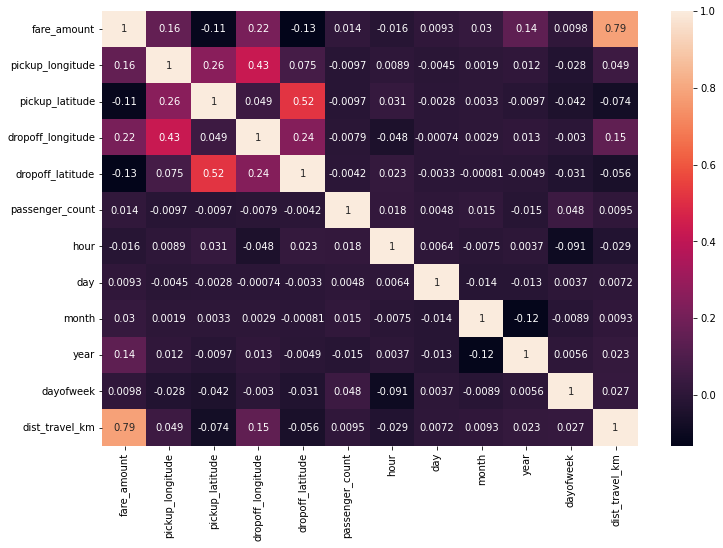

In [36]:
fig,axis = plt.subplots(figsize = (12,8))
#Correlation Heatmap (Light values means highly correlated)
sns.heatmap(df.corr(),annot = True) 

**Dividing the dataset into feature and target values**

In [37]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_travel_km'],
      dtype='object')

In [38]:
x=df[['pickup_longitude','pickup_latitude','dropoff_longitude',
      'dropoff_latitude','passenger_count','hour','day','month',
      'year','dayofweek','dist_travel_km']]

In [39]:
y=df[['fare_amount']]

**Dividing the dataset into training and testing dataset**


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

**Linear Regression**


In [41]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [42]:
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
regression.intercept_ #To find the linear intercept

array([3779.00560071])

In [44]:
regression.coef_ #To find the linear coeeficient

array([[ 2.57457893e+01, -6.61066060e+00,  2.10215581e+01,
        -1.93587498e+01,  5.38030754e-02,  8.88442096e-03,
         4.29939852e-03,  5.92900691e-02,  3.69521146e-01,
        -3.55853647e-02,  1.84826576e+00]])

In [45]:
prediction = regression.predict(X_test) #To predict the target values

In [46]:
print(prediction)

[[17.50994121]
 [ 6.99860088]
 [10.84292277]
 ...
 [10.72940609]
 [ 6.54627526]
 [ 6.36345303]]


In [47]:
y_test

,fare_amount
40115,16.1
27915,4.9
50169,17.0
41698,7.5
20542,12.5
...,...
48635,17.7
42101,5.7
37659,9.7
11076,4.1


In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test,prediction)

0.682803439471712

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
MSE=mean_squared_error(y_test,prediction)


In [52]:
MSE

9.484117197738067

In [53]:
RMSE = np.sqrt(MSE)


In [54]:
RMSE

3.0796293929202045

# **Random Forest Regression**


In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf =RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees


In [57]:
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [58]:
y_pred = rf.predict(X_test)

In [59]:
y_pred

array([20.0525,  7.352 , 12.4283, ..., 10.2945,  6.366 ,  4.515 ])

**Metrics evaluatin for Random Forest**


In [60]:
R2_Random = r2_score(y_test,y_pred)

In [61]:
R2_Random

0.7968363495400521

In [62]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [63]:
MSE_Random

6.0745547431955815

In [64]:
RMSE_Random = np.sqrt(MSE_Random)

In [65]:
RMSE_Random

2.464661182230852